In [58]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd

# Read the WAV file
samplerate, audio = wavfile.read('brownian.wav')

# Assuming the audio is mono; if stereo, choose one channel
if audio.ndim == 2:
    audio = audio[:, 0]  # Take the left channel for simplicity

# Get the number of samples
n = len(audio)

# Perform FFT on the audio
y = np.fft.fft(audio)

# Option 3: Shift the frequencies (nasty auto-tuner)
yMod = np.zeros(n, dtype=np.complex128)

for f in range(n // 2):
    oldfreq = int(0.95 * f)
    yMod[f] = y[oldfreq]
    yMod[-f] = y[-oldfreq]

# Take the inverse FFT to get the audio back
xMod = np.real(np.fft.ifft(yMod)).astype(np.int16)

Text(0, 0.5, 'Amplitude')

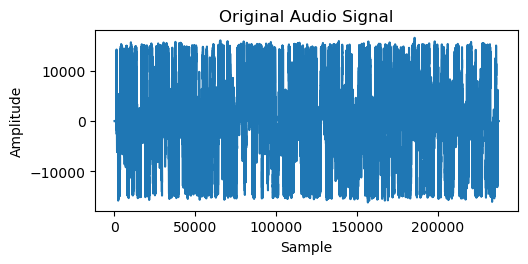

In [59]:
# Plotting
plt.figure(figsize=(12, 8))

# Original Audio
plt.subplot(3, 2, 1)
plt.plot(audio)
plt.title("Original Audio Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

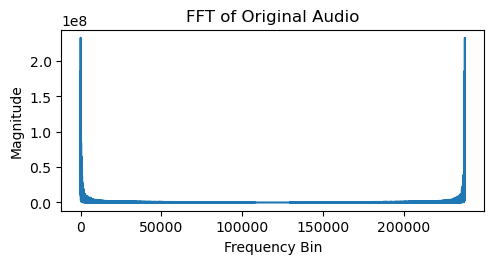

In [61]:
# Plotting
plt.figure(figsize=(12, 8))

# FFT of Original Audio
plt.subplot(3, 2, 2)
plt.plot(np.abs(y))
plt.title("FFT of Original Audio")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Amplitude')

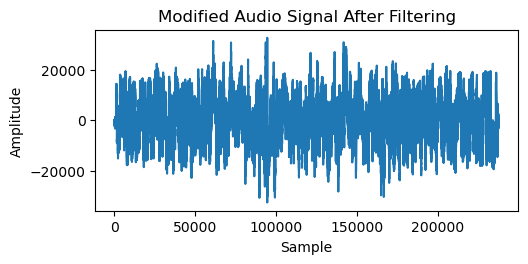

In [62]:
# Plotting
plt.figure(figsize=(12, 8))

# Modified Audio (after shifting frequencies)
plt.subplot(3, 2, 3)
plt.plot(xMod)
plt.title("Modified Audio Signal After Filtering")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

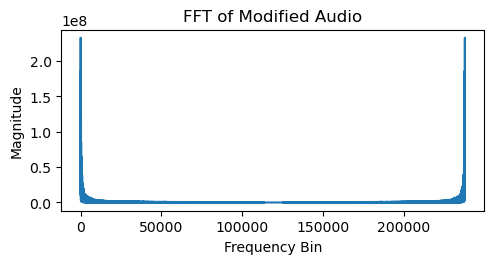

In [64]:
# Plotting
plt.figure(figsize=(12, 8))

# FFT of Modified Audio
plt.subplot(3, 2, 4)
plt.plot(np.abs(yMod))
plt.title("FFT of Modified Audio")
plt.xlabel("Frequency Bin")
plt.ylabel("Magnitude")

In [ ]:
# Play the input audio for comparison
sd.play(audio, samplerate)
sd.wait()

In [ ]:
# Play the modified audio
sd.play(xMod, samplerate)
sd.wait()